Perform exploratory data analysis on Boston house pricing dataset. You need to perform the tasks mentioned in the text boxes in the jupyter notebook.

In [70]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [71]:
from sklearn import datasets
boston_data = datasets.load_boston()

/opt/homebrew/Caskroom/miniforge/base/envs/mapbox_demo/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

Import required libraries[link text](https://)

In [72]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

Analyse the dataset, check for duplicates

In [73]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Remove duplicates if any, check for missing values and find a way to replace the missing values

In [74]:
df=df.dropna()

In [75]:
dups = df.pivot_table(index=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"],aggfunc ='size')
print(dups)

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS     RAD   TAX    PTRATIO  B       LSTAT
0.00632   18.0  2.31   0.0   0.538  6.575  65.2   4.0900  1.0   296.0  15.3     396.90  4.98     1
0.00906   90.0  2.97   0.0   0.400  7.088  20.8   7.3073  1.0   285.0  15.3     394.72  7.85     1
0.01096   55.0  2.25   0.0   0.389  6.453  31.9   7.3073  1.0   300.0  15.3     394.72  8.23     1
0.01301   35.0  1.52   0.0   0.442  7.241  49.3   7.0379  1.0   284.0  15.5     394.74  5.49     1
0.01311   90.0  1.22   0.0   0.403  7.249  21.9   8.6966  5.0   226.0  17.9     395.93  4.81     1
                                                                                                ..
45.74610  0.0   18.10  0.0   0.693  4.519  100.0  1.6582  24.0  666.0  20.2     88.27   36.98    1
51.13580  0.0   18.10  0.0   0.597  5.757  100.0  1.4130  24.0  666.0  20.2     2.60    10.11    1
67.92080  0.0   18.10  0.0   0.693  5.683  100.0  1.4254  24.0  666.0  20.2     384.97  22.98    1
73.53410  0.0  

In [76]:
df.drop_duplicates()
len(df)

506

In [77]:
df['TARGET'] = data.target

In [78]:
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  TARGET  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   

Plot heatmap, pairplot, boxplot, mean, var, histogram to understand the type of data

In [79]:
import seaborn as sns

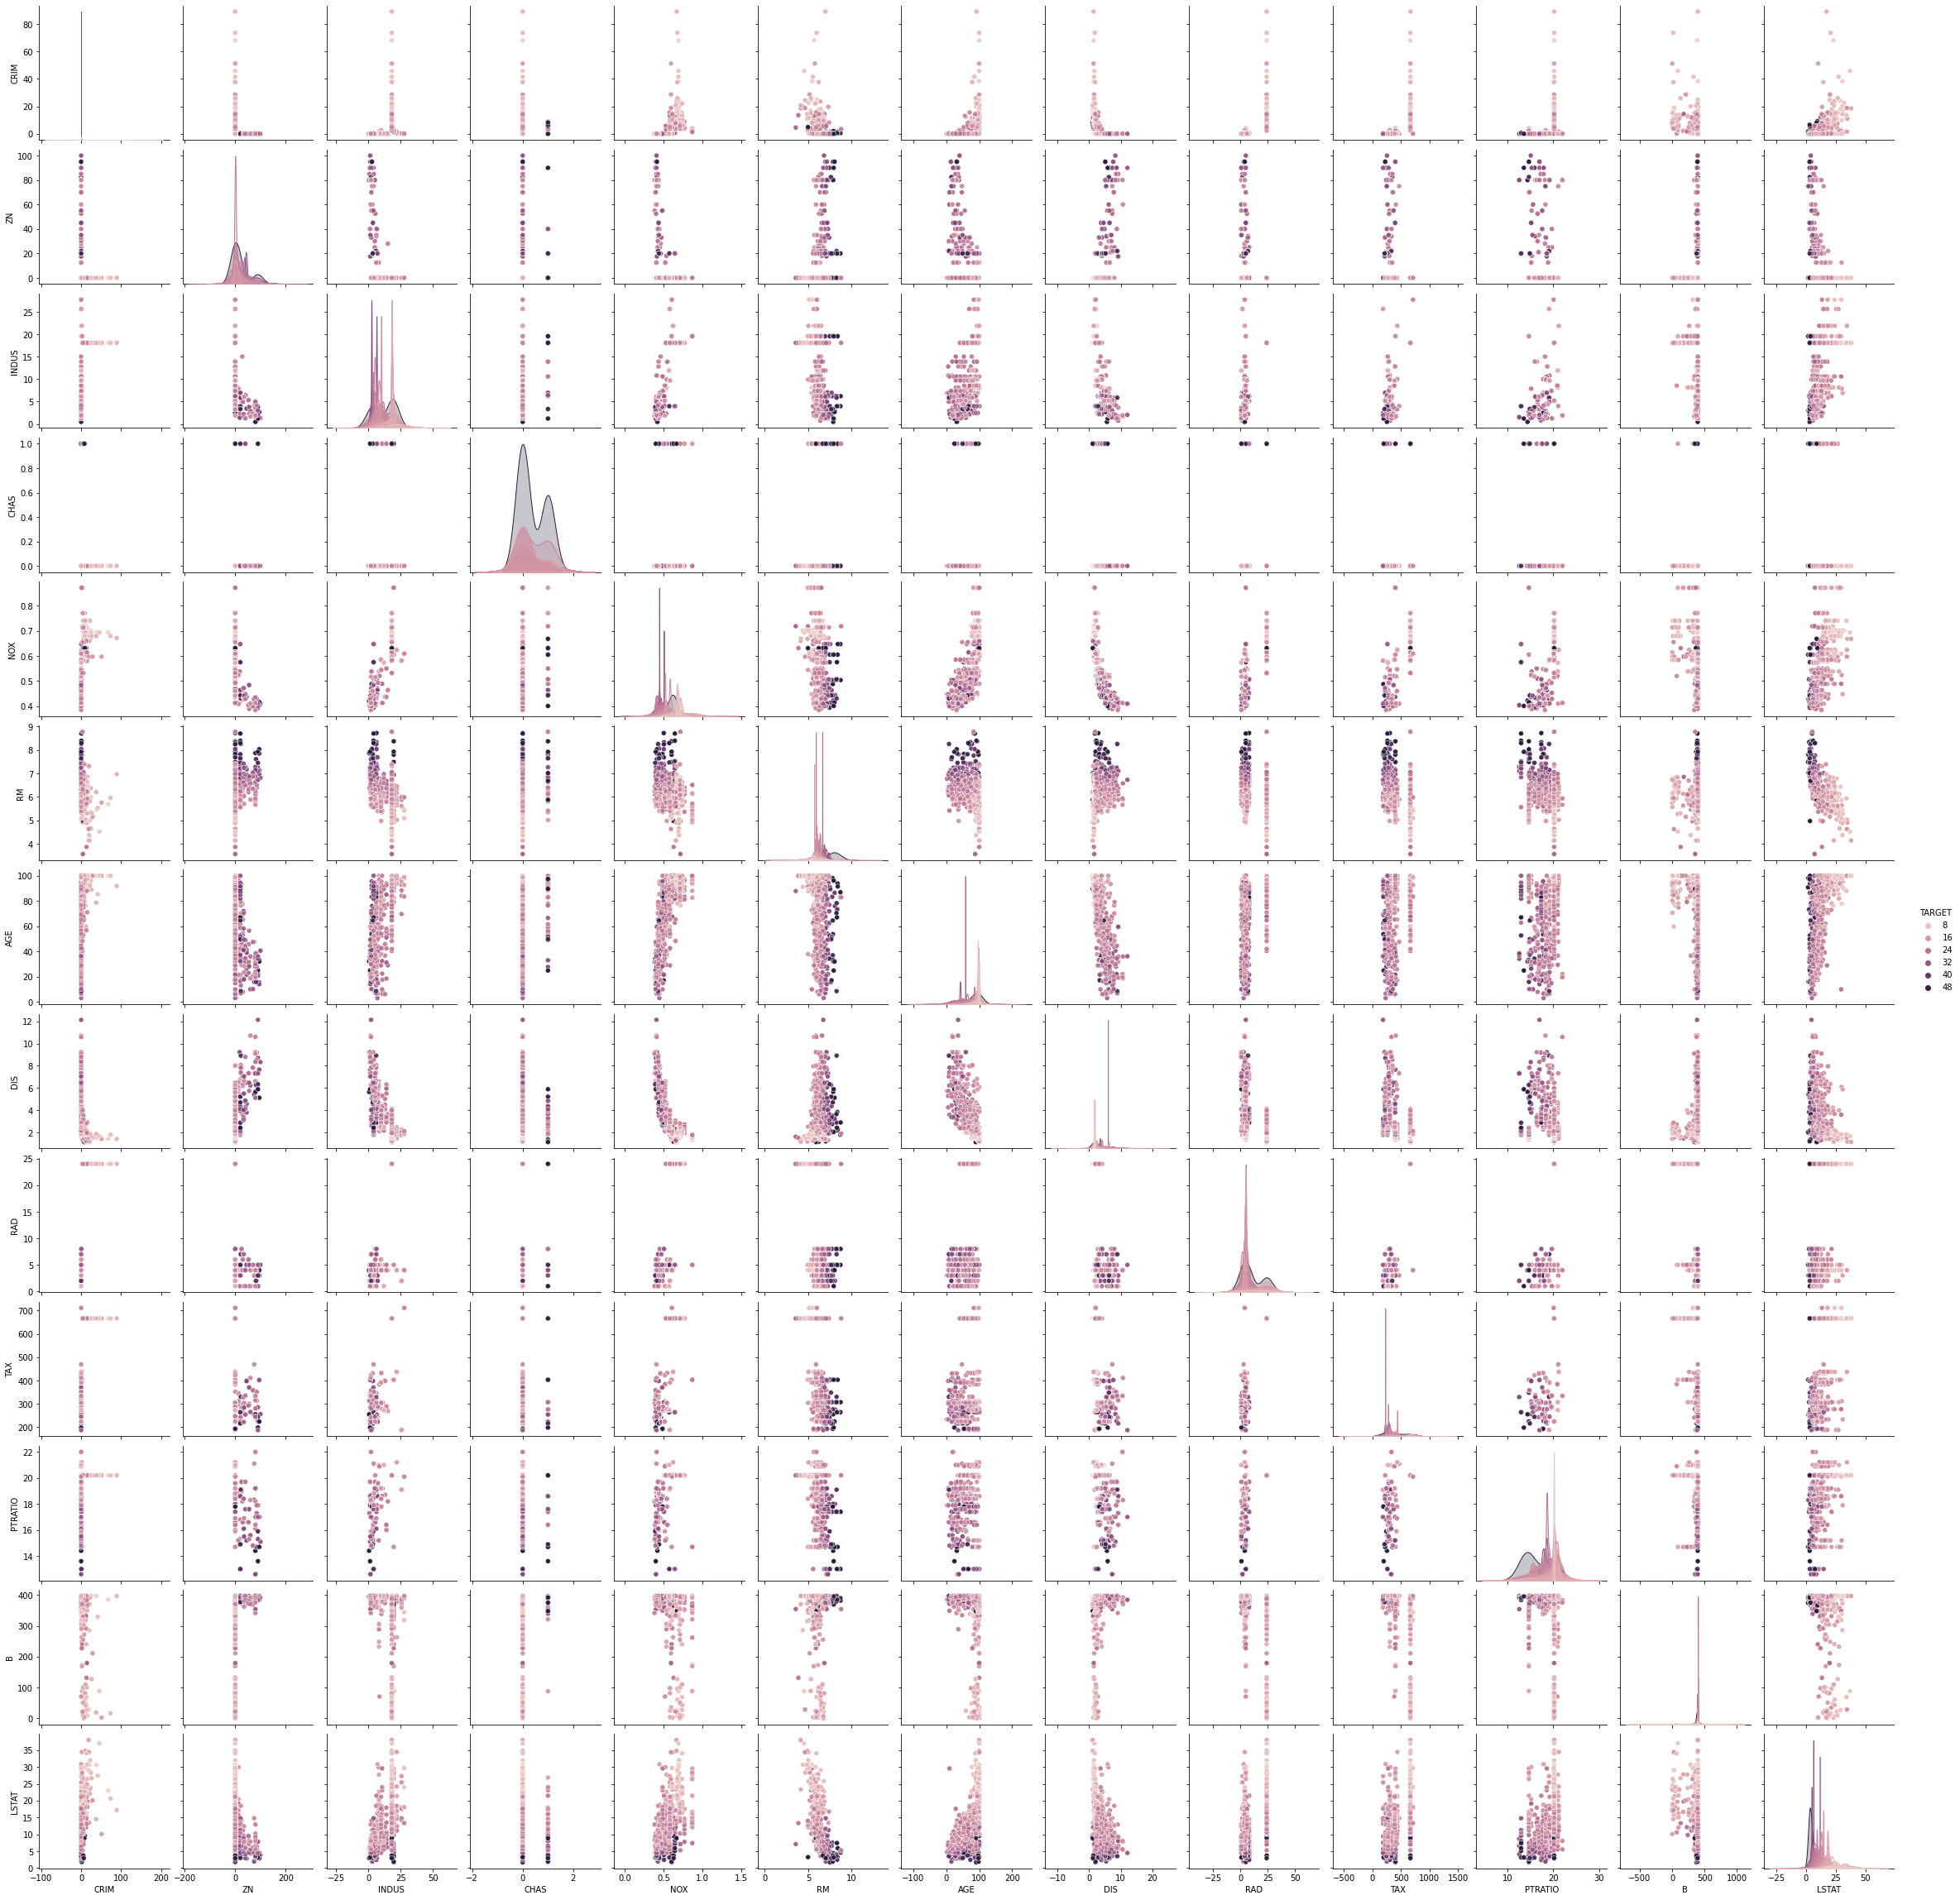

In [80]:
sns.pairplot(df,hue='TARGET')

<AxesSubplot:xlabel='CRIM'>

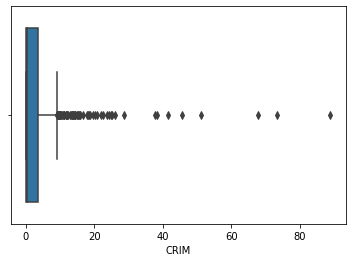

In [81]:
sns.boxplot(x='CRIM', data=df)

In [82]:
Q1 = np.percentile(df['CRIM'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(df['CRIM'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", df.shape)
  
# Upper bound
upper = np.where(df['CRIM'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(df['CRIM'] <= (Q1-1.5*IQR))

Old Shape:  (506, 14)


In [83]:
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

New Shape:  (440, 14)


<AxesSubplot:xlabel='CRIM'>

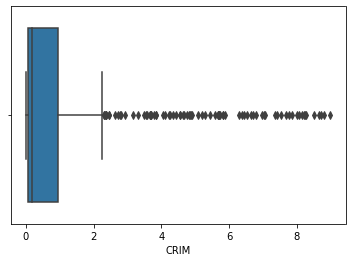

In [84]:
print("New Shape: ", df.shape)
  
sns.boxplot(x='CRIM', data=df)

<AxesSubplot:>

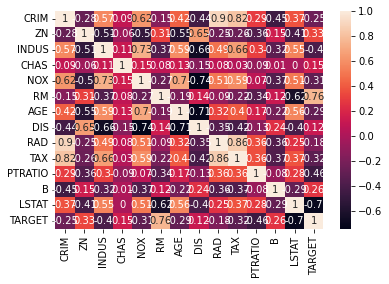

In [85]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)